In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import os
#os.getcwd()

In [2]:
ri = pd.read_csv('/Users/ecuerbo/python/pyprac/data/ri.csv')
ri.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


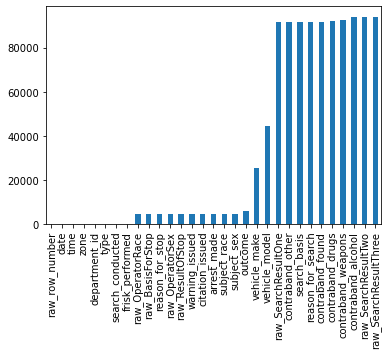

In [10]:
ri[ri['zone']=='X3'].isnull().sum().sort_values().plot(kind='bar');plt.show()

In [14]:
nig = ri[ri['subject_race']=='Black']
wit = ri[ri['subject_race']=='White']

In [28]:
ri['subject_sex'].value_counts(normalize=True)

male      0.727128
female    0.272872
Name: subject_sex, dtype: float64

In [30]:
for x in ri.columns:
    print(ri[x].value_counts(normalize=True))

1         0.000002
339784    0.000002
339797    0.000002
339796    0.000002
339795    0.000002
            ...   
169890    0.000002
169889    0.000002
169888    0.000002
169887    0.000002
509681    0.000002
Name: raw_row_number, Length: 509681, dtype: float64
2006-05-21    0.000593
2015-09-05    0.000593
2006-06-13    0.000575
2012-01-08    0.000573
2012-01-07    0.000569
                ...   
2005-03-14    0.000002
2005-02-17    0.000002
2005-04-04    0.000002
2005-08-09    0.000002
2005-06-18    0.000002
Name: date, Length: 3809, dtype: float64
10:00:00    0.003459
11:00:00    0.003451
09:00:00    0.003226
10:30:00    0.003188
09:30:00    0.002921
              ...   
04:52:00    0.000016
05:21:00    0.000016
05:39:00    0.000016
05:09:00    0.000014
05:22:00    0.000014
Name: time, Length: 1440, dtype: float64
X4    0.265562
K3    0.223250
K2    0.198958
X3    0.184547
K1    0.094889
X1    0.032796
Name: zone, dtype: float64
white                     0.717287
black               

In [50]:
speeding = ri.loc[ri['reason_for_stop']=='Speeding']

In [53]:
speeding.shape

(268744, 31)

In [52]:
speeding.isnull().sum()

raw_row_number                0
date                          0
time                          0
zone                          0
subject_race                  0
subject_sex                   8
department_id                 0
type                          0
arrest_made                   0
citation_issued               0
warning_issued                0
outcome                     533
contraband_found         263216
contraband_drugs         263827
contraband_weapons       265118
contraband_alcohol       268342
contraband_other         263216
frisk_performed               0
search_conducted              0
search_basis             263216
reason_for_search        263216
reason_for_stop               0
vehicle_make             107896
vehicle_model            150979
raw_BasisForStop              0
raw_OperatorRace              0
raw_OperatorSex               0
raw_ResultOfStop              0
raw_SearchResultOne      263216
raw_SearchResultTwo      268438
raw_SearchResultThree    268686
dtype: i

In [54]:
speeding['subject_race'].value_counts(normalize=True)

white                     0.792907
black                     0.105223
hispanic                  0.066171
asian/pacific islander    0.032548
other                     0.003152
Name: subject_race, dtype: float64

In [62]:
black = speeding[speeding.subject_race=='black']
white = speeding[speeding.subject_race=='white']
hispanic = speeding[speeding.subject_race=='hispanic']

In [80]:
black['arrest_made'].value_counts(normalize=True)

False    0.971144
True     0.028856
Name: arrest_made, dtype: float64

In [81]:
white['arrest_made'].value_counts(normalize=True)

False    0.989441
True     0.010559
Name: arrest_made, dtype: float64

In [82]:
hispanic['arrest_made'].value_counts(normalize=True)

False    0.971265
True     0.028735
Name: arrest_made, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject_race', ylabel='count'>

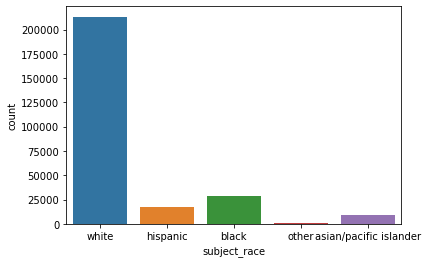

In [86]:
sns.countplot(speeding['subject_race'])

<AxesSubplot:xlabel='count', ylabel='subject_race'>

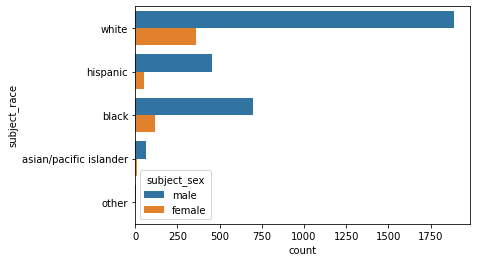

In [116]:
sns.countplot(y='subject_race', hue='subject_sex', data=speeding[speeding.arrest_made==True])

<AxesSubplot:xlabel='count', ylabel='subject_race'>

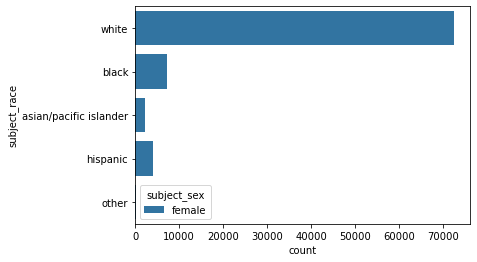

In [114]:
sns.countplot(y='subject_race', hue='subject_sex', data=speeding[speeding.subject_sex=='female'])

<AxesSubplot:xlabel='count', ylabel='subject_race'>

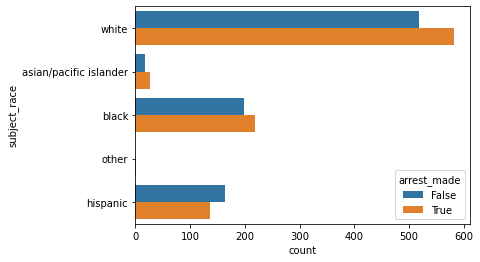

In [119]:
sns.countplot(y='subject_race', hue='arrest_made', data=speeding[speeding.reason_for_search=='Incident to Arrest'])

In [125]:
speeding.drop(['type', 'reason_for_stop'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
x = speeding.isnull().sum()

In [143]:
x.dtype

dtype('int64')

In [150]:
s = x[x>500].index
print(s)

Index(['outcome', 'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'contraband_alcohol', 'contraband_other', 'search_basis',
       'reason_for_search', 'vehicle_make', 'vehicle_model',
       'raw_SearchResultOne', 'raw_SearchResultTwo', 'raw_SearchResultThree'],
      dtype='object')


In [153]:
speeding.drop(s, axis=1, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [156]:
speeding['date'] = pd.to_datetime(speeding['date'])
speeding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268744 entries, 0 to 509679
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   raw_row_number    268744 non-null  int64         
 1   date              268744 non-null  datetime64[ns]
 2   time              268744 non-null  object        
 3   zone              268744 non-null  object        
 4   subject_race      268744 non-null  object        
 5   subject_sex       268736 non-null  object        
 6   department_id     268744 non-null  object        
 7   arrest_made       268744 non-null  object        
 8   citation_issued   268744 non-null  object        
 9   warning_issued    268744 non-null  object        
 10  frisk_performed   268744 non-null  object        
 11  search_conducted  268744 non-null  bool          
 12  raw_BasisForStop  268744 non-null  object        
 13  raw_OperatorRace  268744 non-null  object        
 14  raw_

/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_12090/634244338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeding['date'] = pd.to_datetime(speeding['date'])


In [157]:
speeding.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,arrest_made,citation_issued,warning_issued,frisk_performed,search_conducted,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop
0,1,2005-11-22,11:15:00,X3,white,male,200,False,True,False,False,False,SP,W,M,M
1,2,2005-10-01,12:20:00,X3,white,male,200,False,True,False,False,False,SP,W,M,M
2,3,2005-10-01,12:30:00,X3,white,female,200,False,True,False,False,False,SP,W,F,M
3,4,2005-10-01,12:50:00,X3,white,male,200,False,True,False,False,False,SP,W,M,M
4,5,2005-10-01,13:10:00,X3,white,female,200,False,True,False,False,False,SP,W,F,M


In [98]:
speeding['time'].value_counts(normalize=True)

10:00:00    0.004201
11:00:00    0.004060
09:00:00    0.003870
10:30:00    0.003803
09:30:00    0.003628
              ...   
04:51:00    0.000004
05:22:00    0.000004
04:58:00    0.000004
05:23:00    0.000004
04:38:00    0.000004
Name: time, Length: 1438, dtype: float64

In [44]:
ri['reason_for_search'].value_counts(normalize=True)

Incident to Arrest                                          0.393987
Probable Cause                                              0.116147
Odor of Drugs/Alcohol                                       0.105394
Reasonable Suspicion                                        0.064238
Inventory/Tow                                               0.061986
                                                              ...   
Reasonable Suspicion|Inventory/Tow|Odor of Drugs/Alcohol    0.000056
Odor of Drugs/Alcohol|Inventory/Tow|Reasonable Suspicion    0.000056
Terry Frisk|Reasonable Suspicion|Odor of Drugs/Alcohol      0.000056
Plain View|Reasonable Suspicion|Odor of Drugs/Alcohol       0.000056
Reasonable Suspicion|Incident to Arrest|Probable Cause      0.000056
Name: reason_for_search, Length: 188, dtype: float64

In [31]:
ri['type'].unique()
ri['raw_SearchResultTwo'].unique()

array([nan, 'W', 'D', 'A', 'O', 'M'], dtype=object)

In [6]:
#drop
contraband = ri.dropna(subset=["contraband_found"])

In [7]:
contraband.isnull().sum()

raw_row_number               0
date                         0
time                         0
zone                         0
subject_race                 0
subject_sex                  0
department_id                0
type                         0
arrest_made                  0
citation_issued              0
warning_issued               0
outcome                    431
contraband_found             0
contraband_drugs          1774
contraband_weapons        5967
contraband_alcohol       16545
contraband_other             0
frisk_performed              0
search_conducted             0
search_basis                 0
reason_for_search            0
reason_for_stop              0
vehicle_make              5020
vehicle_model             8571
raw_BasisForStop             0
raw_OperatorRace             0
raw_OperatorSex              0
raw_ResultOfStop             0
raw_SearchResultOne          0
raw_SearchResultTwo      16943
raw_SearchResultThree    17594
dtype: int64

In [8]:
contraband['contraband_found'].count()

17762

In [9]:
contraband.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
297,298,2005-12-06,16:29:00,K2,black,male,900,vehicular,False,True,...,Registration Violation,AUDI,100S,RV,B,M,M,N,NaN,NaN
304,305,2005-12-01,20:00:00,K3,black,male,300,vehicular,False,True,...,Other Traffic Violation,NaN,NaN,OT,B,M,M,N,NaN,NaN
305,306,2005-12-01,20:25:00,K3,black,male,300,vehicular,False,True,...,Registration Violation,NaN,NaN,RV,B,M,M,N,NaN,NaN
306,307,2005-12-01,21:05:00,K3,black,female,300,vehicular,False,True,...,Registration Violation,NaN,NaN,RV,B,F,M,N,NaN,NaN
316,317,2005-12-07,02:38:00,K3,white,male,300,vehicular,True,False,...,Speeding,NaN,NaN,SP,W,M,P,N,NaN,NaN


In [10]:
contraband['contraband_found'].unique()

array([False, True], dtype=object)

In [11]:
contraband.date.dtype

dtype('O')

In [12]:
combined = contraband.date.str.cat(contraband.time, sep=' ')

In [13]:
combined.head()

297    2005-12-06 16:29:00
304    2005-12-01 20:00:00
305    2005-12-01 20:25:00
306    2005-12-01 21:05:00
316    2005-12-07 02:38:00
Name: date, dtype: object

In [14]:
contraband['dt'] = pd.to_datetime(combined)

/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_9018/3833834112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contraband['dt'] = pd.to_datetime(combined)


In [15]:
contraband.set_index('dt', inplace=True)

In [16]:
contraband.dtypes

raw_row_number            int64
date                     object
time                     object
zone                     object
subject_race             object
subject_sex              object
department_id            object
type                     object
arrest_made              object
citation_issued          object
warning_issued           object
outcome                  object
contraband_found         object
contraband_drugs         object
contraband_weapons       object
contraband_alcohol       object
contraband_other         object
frisk_performed          object
search_conducted           bool
search_basis             object
reason_for_search        object
reason_for_stop          object
vehicle_make             object
vehicle_model            object
raw_BasisForStop         object
raw_OperatorRace         object
raw_OperatorSex          object
raw_ResultOfStop         object
raw_SearchResultOne      object
raw_SearchResultTwo      object
raw_SearchResultThree    object
dtype: o

In [17]:
ri = contraband.drop([
'raw_row_number','date','time','type', 'vehicle_make',
       'vehicle_model',"search_conducted", 'raw_SearchResultTwo',
       'raw_SearchResultThree'], axis = 1)

In [18]:
boo=['arrest_made','citation_issued', 'warning_issued', 'contraband_found','frisk_performed']
ri[boo]=ri[boo].astype('bool')

In [19]:
cat=['zone', 'subject_race', 'subject_sex', 'department_id', 'outcome', 
       'contraband_drugs', 'contraband_weapons', 'contraband_alcohol',
       'contraband_other', 'search_basis', 'reason_for_stop',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne']
ri[cat] = ri[cat].astype('category')

In [20]:
all=['zone', 'subject_race', 'subject_sex', 'department_id', 'outcome', 
       'contraband_drugs', 'contraband_weapons', 'contraband_alcohol',
       'contraband_other', 'search_basis', 'reason_for_stop',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne','arrest_made','citation_issued', 'warning_issued', 'contraband_found','frisk_performed','reason_for_search']
clean = ri[all]

In [21]:
clean.describe()

,zone,subject_race,subject_sex,department_id,outcome,contraband_drugs,contraband_weapons,contraband_alcohol,contraband_other,search_basis,...,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,arrest_made,citation_issued,warning_issued,contraband_found,frisk_performed,reason_for_search
count,17762,17762,17762,17762,17331,15988,11795,1217,17762,17762,...,17762,17762,17762,17762,17762,17762,17762,17762,17762,17762
unique,6,5,2,16,3,2,2,2,2,3,...,7,2,6,6,2,2,2,2,2,188
top,X4,white,male,500,citation,False,False,True,False,other,...,W,M,M,N,False,True,False,False,True,Incident to Arrest
freq,6410,9968,15303,5514,10513,11223,11296,1120,16771,9035,...,9968,15303,10513,11183,11575,10513,17131,11183,9322,6998


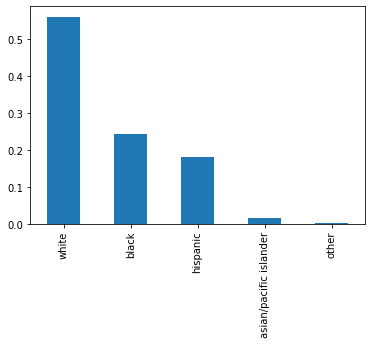

In [23]:
import matplotlib.pyplot as plt
clean['subject_race'].value_counts(normalize=True).plot(kind='bar');plt.show()

In [24]:
ri.shape

(17762, 22)

In [ ]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

In [ ]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)